In [ ]:
# -*- coding: utf-8 -*-
"""
Test Quantum State and Tomography routines
"""

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg




# prepare channel
p = 0.1
channel = lambda rho: ch.depolarize_channel(rho, p)
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'


# Number of qubit copies for each axis
# N = 10000
N_list = [100, 200, 500, 700, 1000, 1500]#, 2000, 5000, 7000]


"""
How perfomance of LI method depends on number of copies of initial states
"""

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))

# arrays of different distances for average values storage
tr_dist_val_av  = []
hs_dist_val_av  = []
fro_dist_val_av = []

tr_dist_val_pr_av  = []
hs_dist_val_pr_av  = []
fro_dist_val_pr_av = []

rep_numb = 50 # number of repetitions of experiment (for smooth results)
for i in range(rep_numb):
    C_est_list = []
    for n in N_list:

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

        # recover C_est
        C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
        C_est_LI = C_est_LI.reshape(4,4)
        C_est_list.append(C_est_LI)


    # arrays of different distances
    tr_dist_val = []
    hs_dist_val = []
    fro_dist_val = []

    tr_dist_val_pr = []
    hs_dist_val_pr = []
    fro_dist_val_pr = []

    for C in C_est_list:
        fro_dist_val.append(LA.norm(C - C_true))
        fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
        hs_dist_val.append(tmg.hs_dist(C, C_true))
        hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        tr_dist_val.append(tmg.tr_dist(C, C_true))
        tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

    fro_dist_val_av.append(fro_dist_val)
    fro_dist_val_pr_av.append(fro_dist_val_pr)
    hs_dist_val_av.append(hs_dist_val)
    hs_dist_val_pr_av.append(hs_dist_val_pr)
    tr_dist_val_av.append(tr_dist_val)
    tr_dist_val_pr_av.append(tr_dist_val_pr)

# convert lists in arrays
tr_dist_val_av  = np.array(tr_dist_val_av)
hs_dist_val_av  = np.array(hs_dist_val_av)
fro_dist_val_av = np.array(fro_dist_val_av)

tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
fro_dist_val_pr_av = np.array(fro_dist_val_pr_av)


# compute mean values for every array
tr_dist_val_av  = np.mean(tr_dist_val_av, axis = 0)
hs_dist_val_av  = np.mean(hs_dist_val_av, axis = 0)
fro_dist_val_av = np.mean(fro_dist_val_av, axis = 0)

tr_dist_val_pr_av = np.mean(tr_dist_val_pr_av,  axis=0)
hs_dist_val_pr_av = np.mean(hs_dist_val_pr_av,  axis=0)
fro_dist_val_pr_av = np.mean(fro_dist_val_pr_av, axis=0)




# # Plot the perfomance of Pseudo-Inverse matrix method (without projection on CPTP set)

# plt.figure(figsize=(8,6))
# plt.semilogx(N_list, tr_dist_val_av,  label= 'Trace distance',           marker='o')
# plt.semilogx(N_list, hs_dist_val_av,  label= 'Hilbert Schmidt distance', marker= '>')
# plt.semilogx(N_list, fro_dist_val_av, label= 'Frobenius norm',           marker='x')

# plt.xlabel('Number of copies')
# plt.ylabel('Error')
# plt.title('Perfomance of Pseudo-Inverse Matrix Method')
# plt.legend()
# plt.show()


#%%

# arrays of different distances for average values storage
ml_tr_dist_val_av  = []
ml_hs_dist_val_av  = []
ml_fro_dist_val_av = []

ml_tr_dist_val_pr_av  = []
ml_hs_dist_val_pr_av  = []
ml_fro_dist_val_pr_av = []


for i in range(rep_numb):
    C_est_list = []
    for n in N_list:

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

        # recover C_est
        C_est_ML = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL)[-1]
        C_est_ML = C_est_ML.reshape(4,4)
        C_est_list.append(C_est_ML)


    # arrays of different distances
    ml_tr_dist_val = []
    ml_hs_dist_val = []
    ml_fro_dist_val = []

    ml_tr_dist_val_pr = []
    ml_hs_dist_val_pr = []
    ml_fro_dist_val_pr = []

    for C in C_est_list:
        ml_fro_dist_val.append(LA.norm(C - C_true))
        ml_fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
        ml_hs_dist_val.append(tmg.hs_dist(C, C_true))
        ml_hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        ml_tr_dist_val.append(tmg.tr_dist(C, C_true))
        ml_tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

    ml_fro_dist_val_av.append(ml_fro_dist_val)
    ml_fro_dist_val_pr_av.append(ml_fro_dist_val_pr)
    ml_hs_dist_val_av.append(ml_hs_dist_val)
    ml_hs_dist_val_pr_av.append(ml_hs_dist_val_pr)
    ml_tr_dist_val_av.append(ml_tr_dist_val)
    ml_tr_dist_val_pr_av.append(ml_tr_dist_val_pr)

# convert lists in arrays
ml_tr_dist_val_av  = np.array(ml_tr_dist_val_av)
ml_hs_dist_val_av  = np.array(ml_hs_dist_val_av)
ml_fro_dist_val_av = np.array(ml_fro_dist_val_av)

ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
ml_fro_dist_val_pr_av = np.array(ml_fro_dist_val_pr_av)


# compute mean values for every array
ml_tr_dist_val_av  = np.mean(ml_tr_dist_val_av, axis = 0)
ml_hs_dist_val_av  = np.mean(ml_hs_dist_val_av, axis = 0)
ml_fro_dist_val_av = np.mean(ml_fro_dist_val_av, axis = 0)

ml_tr_dist_val_pr_av  = np.mean(ml_tr_dist_val_pr_av,  axis=0)
ml_hs_dist_val_pr_av  = np.mean(ml_hs_dist_val_pr_av,  axis=0)
ml_fro_dist_val_pr_av = np.mean(ml_fro_dist_val_pr_av, axis=0)

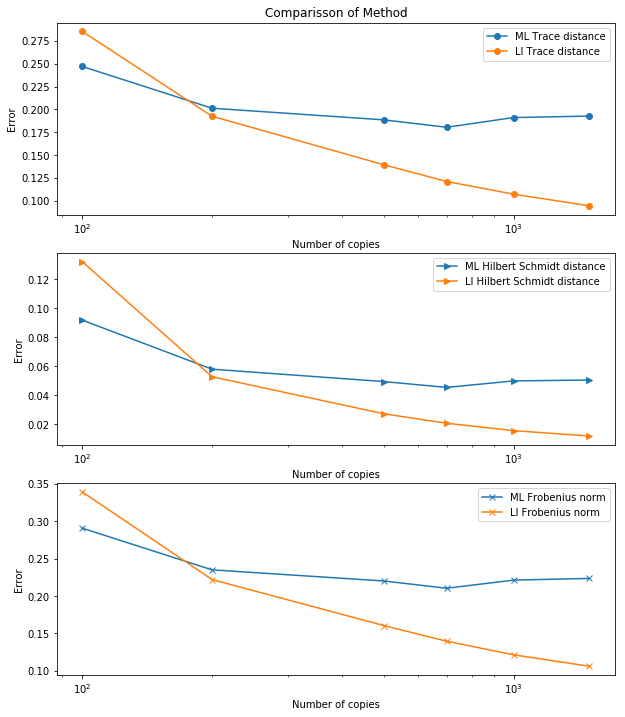

In [2]:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.xlabel('Number of copies')
plt.ylabel('Error')
plt.title('Comparisson of Method')
plt.semilogx(N_list, ml_tr_dist_val_pr_av,  label= 'ML Trace distance',           marker='o')
plt.semilogx(N_list, tr_dist_val_pr_av,  label= 'LI Trace distance',           marker='o')
plt.legend()

plt.subplot(312)
plt.xlabel('Number of copies')
plt.ylabel('Error')
# plt.title('Comparisson of methods Method')
plt.semilogx(N_list, ml_hs_dist_val_pr_av,  label= 'ML Hilbert Schmidt distance', marker= '>')
plt.semilogx(N_list, hs_dist_val_pr_av,  label= 'LI Hilbert Schmidt distance', marker= '>')
plt.legend()

plt.subplot(313)
plt.semilogx(N_list, ml_fro_dist_val_pr_av, label= 'ML Frobenius norm',           marker='x')
plt.semilogx(N_list, fro_dist_val_pr_av, label= 'LI Frobenius norm',           marker='x')

plt.xlabel('Number of copies')
plt.ylabel('Error')
# plt.title('Comparisson of methods Method')
plt.legend()
plt.show()

In [3]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg


# prepare channel
p = 0.
# channel = lambda rho: ch.depolarize_channel(rho, p)
channel = lambda rho: ch.gate_action(rho, 'X')
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))
n = 1000

# collect experimental data
frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

# recover C_est via linear inversion
C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
C_est_LI = tmg.CPTP_proj(C_est_LI).reshape(4,4)


# recover C_est via gradient descend
C_list = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL)
C_est_ML = C_list[-1]
C_est_ML = C_est_ML.reshape(4,4)

In [4]:
print('True channel:\n', np.around(C_true, decimals=3),   '\n')
print('LI recovery:\n',  np.around(C_est_LI, decimals=3), '\n')
print('ML recovery:\n',  np.around(C_est_ML, decimals=3), '\n')

print(LA.norm(C_true - C_est_LI))
print(LA.norm(C_true - C_est_ML))

True channel:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]] 

LI recovery:
 [[ 0.012+0.j    -0.019+0.015j -0.026+0.005j -0.005+0.011j]
 [-0.019-0.015j  0.988-0.j     0.982+0.018j  0.026-0.005j]
 [-0.026-0.005j  0.982-0.018j  0.988-0.j     0.019-0.015j]
 [-0.005-0.011j  0.026+0.005j  0.019+0.015j  0.012+0.j   ]] 

ML recovery:
 [[ 0.001-0.j    -0.023+0.011j -0.023+0.01j  -0.   +0.j   ]
 [-0.023-0.011j  0.999-0.j     0.999+0.019j  0.023-0.01j ]
 [-0.023-0.01j   0.999-0.019j  0.999-0.j     0.023-0.011j]
 [-0.   -0.j     0.023+0.01j   0.023+0.011j  0.001+0.j   ]] 

0.08656730570875056
0.07722236416246651


In [7]:
%%timeit
frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = 1000).reshape(-1,1)

1.44 ms ± 75.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
tmg.protocol_QPT()

1.18 ms ± 53.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
tmg.current_probability(C_true, PROTOCOL)

11.1 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
curr_prob = tmg.current_probability(C_true, PROTOCOL)

In [12]:
%%timeit
tmg.cost(C_true, frequencies, curr_prob)

13.5 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%%timeit
tmg.gradient(C_true, PROTOCOL, frequencies, curr_prob)

35.8 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%%timeit 
tmg.grad_descent(frequencies, PROTOCOL)

87.4 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
C_est_LI = tmg.CPTP_proj(C_est_LI).reshape(4,4)

5.92 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
